<a href="https://colab.research.google.com/github/mohamedbenk0101/Advice-for-Applying-Machine-Learning/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

import time


**User**

In [4]:
user = pd.read_csv("/content/Data/u.user", sep = "|", names = ["user_id", "age", "gender", "occupation", "zip code"])
user = user.replace(to_replace=["M", "F"], value= [1, 0])
del user["zip code"]
user_num = pd.get_dummies(user, columns=['occupation'])
user_df = user_num.drop("user_id", axis = 1)

**K-Means**

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

**Normalisation**

In [6]:
scaler = StandardScaler()
user_scaled = scaler.fit_transform(user_df)

**Silhouette score**

20


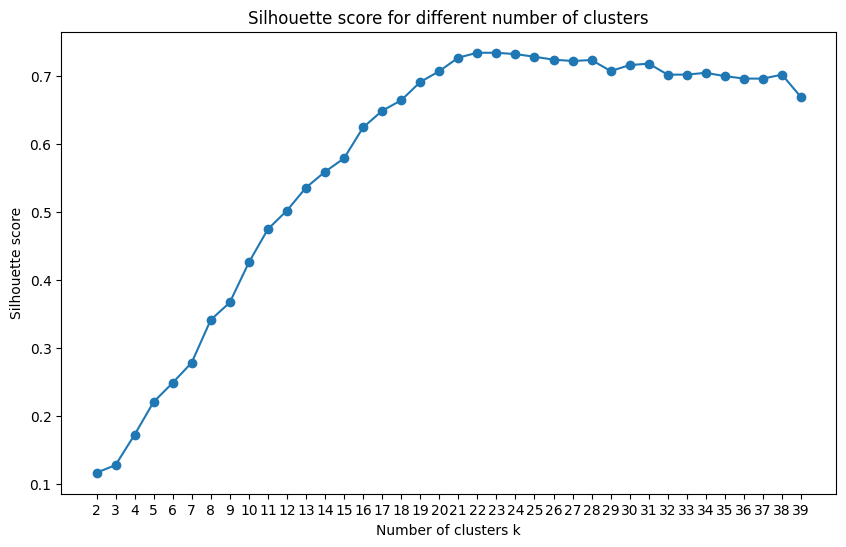

In [7]:
def silhouette(user_scaled):
    silhouette_scores = []
    ks = range(2, 40)  # Le score de silhouette n'est pas défini pour k = 1
    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++', max_iter= 300)
        cluster_labels = kmeans.fit_predict(user_scaled)
        silhouette_avg = silhouette_score(user_scaled, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    print(np.argmax(silhouette_scores))
    # Tracer le score de silhouette pour différents k
    plt.figure(figsize=(10, 6))
    plt.plot(ks, silhouette_scores, '-o')
    plt.xlabel('Number of clusters k')
    plt.ylabel('Silhouette score')
    plt.xticks(ks)
    plt.title('Silhouette score for different number of clusters')
    plt.show()
silhouette(user_scaled)

**Elbow method**

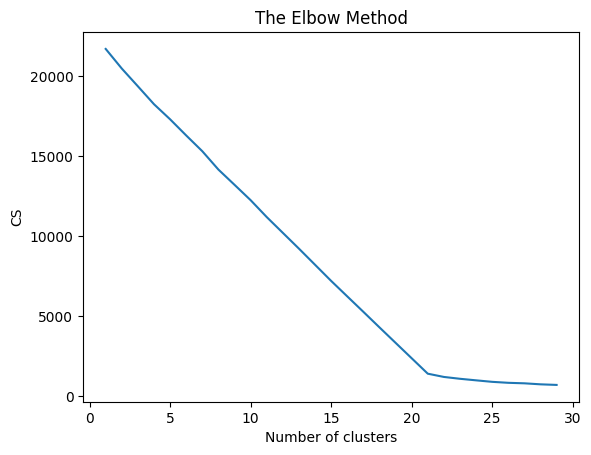

In [8]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(user_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 30), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

**Algorithme K-means**

In [9]:
k = 20
# Application de K-means avec MiniBatchKMeans pour les grands jeux de données

kmeans = KMeans(n_clusters = k, random_state=0, init='k-means++', max_iter = 300)
user_clusters = kmeans.fit_predict(user_scaled)

# Calcul du Silhouette Score
score = silhouette_score(user_scaled, user_clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.7068059936662805


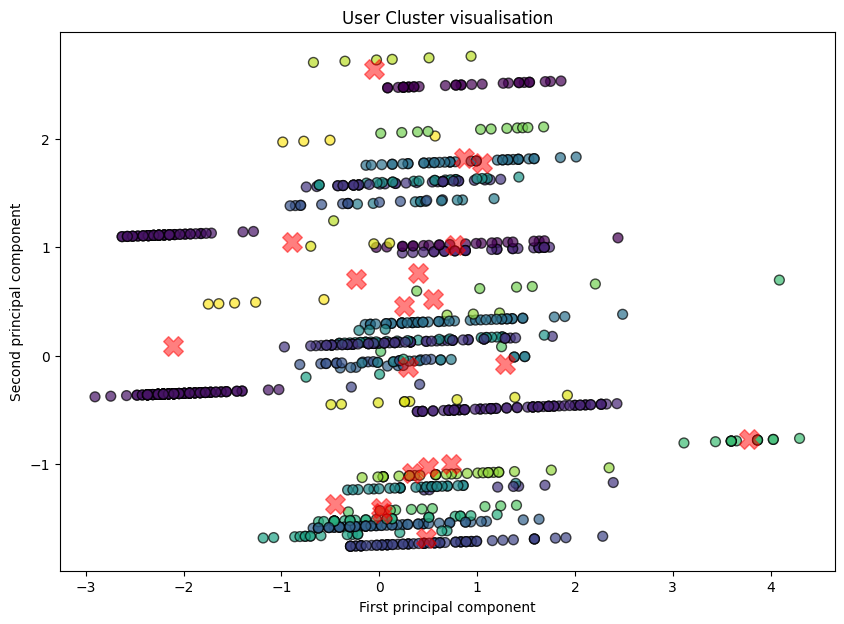

In [10]:
# Réduction de dimensionnalité à 2D pour la visualisation
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
user_df_reduced = pca.fit_transform(user_scaled)

# Visualisation
plt.figure(figsize=(10, 7))
plt.scatter(user_df_reduced[:, 0], user_df_reduced[:, 1], c=user_clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('User Cluster visualisation')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

# Centres de clusters
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')

plt.show()

**Item**

In [11]:
item = pd.read_csv("/content/Data/u.item", sep = "|", names = ["movie_id", "movie title", "release date", "video release date",
              "IMDb URL", "unknown", "Action", "Adventure", "Animation",
              "Children's", "Comedy", "Crime", "Documentary", "Drama", "Fantasy",
              "Film-Noir", "Horror", "Musical", "Mystery", "Romance", "Sci-Fi",
              "Thriller", "Wa", "Western"], encoding="latin-1")
del item["movie title"]
del item["release date"], item["video release date"], item["IMDb URL"], item["unknown"]
item_df = item.drop("movie_id", axis = 1)
scaler = StandardScaler()
item_scaled = scaler.fit_transform(item_df)

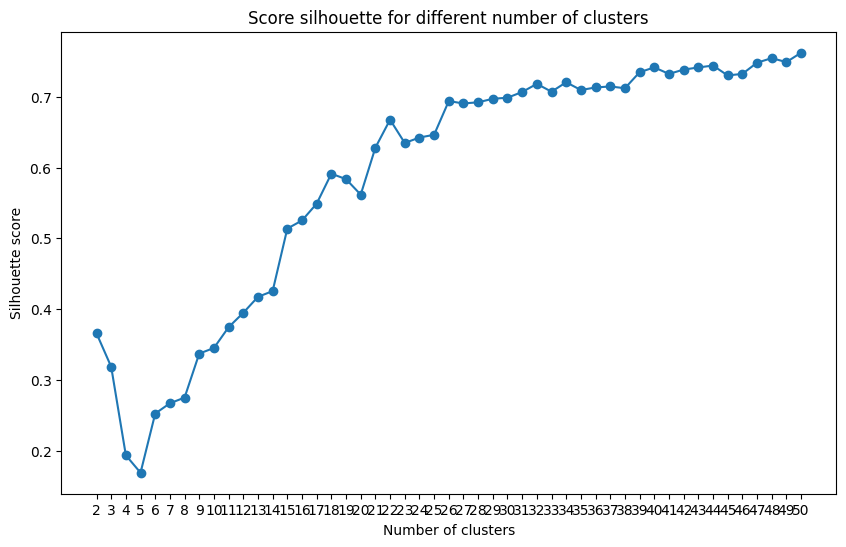

In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
ks = range(2, 51)  # Le score de silhouette n'est pas défini pour k=1
for k in ks:
    kmeans1 = KMeans(n_clusters=k, random_state=0, init='k-means++')
    cluster_labels = kmeans1.fit_predict(item_scaled)
    silhouette_avg = silhouette_score(item_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tracer le score de silhouette pour différents k
plt.figure(figsize=(10, 6))
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.xticks(ks)
plt.title('Score silhouette for different number of clusters')
plt.show()


In [13]:
print(np.argmax(silhouette_scores))

48


In [14]:
k = 48

kmeans2 = KMeans(n_clusters = k, random_state=0, init='k-means++', max_iter= 100)
item_clusters = kmeans2.fit_predict(item_scaled)

# Calcul du Silhouette Score
score = silhouette_score(item_scaled, item_clusters)
print(f'Silhouette Score: {score}')


Silhouette Score: 0.7545004699723571


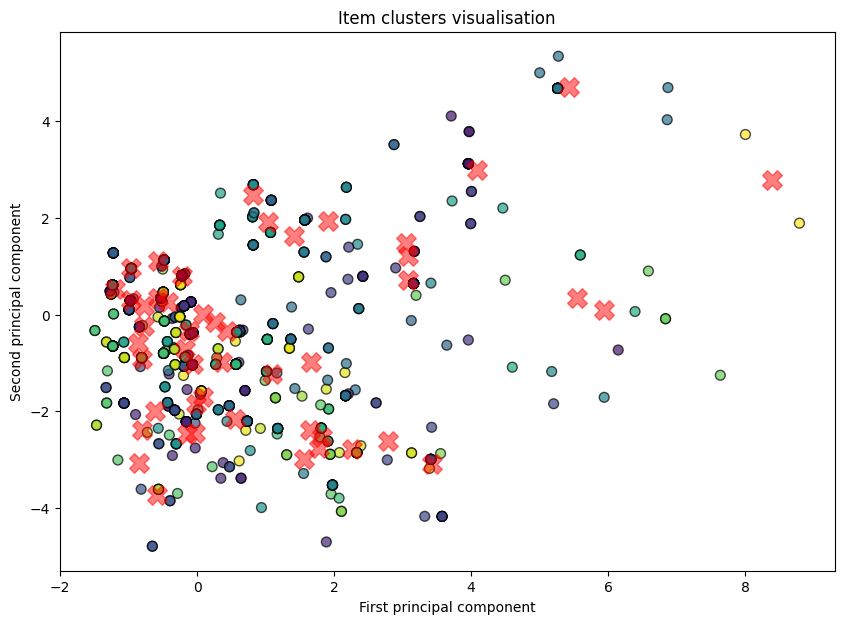

In [15]:
# Réduction de dimensionnalité à 2D pour la visualisation
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
item_df_reduced = pca.fit_transform(item_scaled)

# Visualisation
plt.figure(figsize = (10, 7))
plt.scatter(item_df_reduced[:, 0], item_df_reduced[:, 1], c=item_clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.7)
plt.title('Item clusters visualisation')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

# Centres de clusters
centers = pca.transform(kmeans2.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')

plt.show()

**Rating**

In [16]:
def matrice_remplie_de_la_data(u,methode):
    # Load rating data
    rating_df = pd.read_csv(f'/content/Data/{u}', sep='\t',
                            names=['user_id', 'movie_id', 'rating', 'timestamp'])

    # Assign clusters to ratings
    rating_df['user_cluster'] = rating_df['user_id'].apply(lambda x: user_clusters[x-1])
    rating_df['movie_cluster'] = rating_df['movie_id'].apply(lambda x: item_clusters[x-1])
    # Rating_matrix using pivot
    ratings_matrix = rating_df.pivot_table(index='user_id', columns='movie_id', values='rating')
    if methode =="mean":
      # Calculate mean ratings for each cluster combination
      cluster_means = rating_df.groupby(['user_cluster', 'movie_cluster'])['rating'].mean()
      # Fill in missing ratings based on cluster averages
      for user_id in ratings_matrix.index:
          for movie_id in ratings_matrix.columns:
              if pd.isnull(ratings_matrix.at[user_id, movie_id]):
                  user_clust = rating_df[rating_df['user_id'] == user_id]['user_cluster'].iloc[0]
                  movie_clust = rating_df[rating_df['movie_id'] == movie_id]['movie_cluster'].iloc[0]
                  if (user_clust, movie_clust) in cluster_means.index:
                      ratings_matrix.at[user_id, movie_id] = cluster_means[user_clust, movie_clust]
                  else:
                      ratings_matrix.at[user_id, movie_id] = rating_df['rating'].mean()
    if methode == "most_freq":
      default_rating1 = rating_df['rating'].mean()
      # Calculate most frequent rating for each cluster combination
      from scipy.stats import mode
      cluster_modes1 = rating_df.groupby(['user_cluster', 'movie_cluster'])['rating'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
      # Transformer le résultat en DataFrame pour une meilleure lisibilité
      cluster_modes_df1 = cluster_modes1.reset_index()
      cluster_modes_df1.rename(columns={'rating': 'most_frequent_rating'}, inplace=True)
      for user_id in ratings_matrix.index:
          for movie_id in ratings_matrix.columns:
              # Vérifier si le rating est manquant
              if pd.isnull(ratings_matrix.at[user_id, movie_id]):
                  # Trouver les clusters correspondants pour cet utilisateur et ce film
                  user_clust = user_clusters[user_id - 1]  #
                  movie_clust = item_clusters[movie_id - 1]  #

                  # Extraire le rating le plus fréquent pour cette combinaison de clusters
                  mode_rating = cluster_modes_df1[
                      (cluster_modes_df1['user_cluster'] == user_clust) &
                      (cluster_modes_df1['movie_cluster'] == movie_clust)
                  ]['most_frequent_rating'].values

                  # Si un rating le plus fréquent est trouvé, l'utiliser; sinon, utiliser la moyenne globale
                  if mode_rating.size > 0:
                      ratings_matrix.at[user_id, movie_id] = mode_rating[0]
                  else:
                      ratings_matrix.at[user_id, movie_id] = default_rating1

    return ratings_matrix



In [17]:
matrice_u1 = matrice_remplie_de_la_data("u1.base","mean")

In [18]:
matrice_u1

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.000000,3.000000,4.000000,3.000000,3.000000,3.756923,4.000000,1.000000,5.000000,3.769231,...,3.451220,3.756923,3.756923,3.756923,3.756923,3.756923,3.714286,3.859649,3.262238,3.756923
2,4.000000,3.431507,3.375000,2.638298,3.750000,3.741339,3.549784,3.161850,3.741339,2.000000,...,3.421268,3.741339,3.741339,3.741339,3.741339,3.741339,3.359375,3.716071,3.311161,3.741339
3,3.461538,3.270833,3.220779,3.066667,3.445455,3.506410,3.352941,3.113636,3.506410,3.728571,...,3.320930,3.506410,3.506410,3.506410,3.506410,3.506410,3.451613,3.506550,3.078283,3.506410
4,3.689655,3.243243,3.702703,2.875000,3.448276,3.756923,3.582278,2.800000,3.756923,3.769231,...,3.451220,3.756923,3.756923,3.756923,3.756923,3.756923,3.714286,3.859649,3.262238,3.756923
5,3.598131,3.431507,3.375000,2.638298,3.750000,3.741339,3.549784,3.161850,3.741339,3.925373,...,3.421268,3.741339,3.741339,3.741339,3.741339,3.741339,3.359375,3.716071,3.311161,3.741339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,3.678049,3.396166,3.351464,3.008850,3.805755,3.750133,3.622266,3.090186,5.000000,3.815287,...,3.457795,3.750133,3.750133,3.750133,3.750133,3.750133,3.415929,3.768961,3.257921,3.750133
940,3.652174,3.378788,3.551724,2.000000,3.800000,3.784759,4.000000,5.000000,3.000000,3.991150,...,3.501887,3.784759,3.784759,3.784759,3.784759,3.784759,3.724138,3.787611,3.329670,3.784759
941,5.000000,3.396166,3.351464,3.008850,3.805755,3.750133,4.000000,3.090186,3.750133,3.815287,...,3.457795,3.750133,3.750133,3.750133,3.750133,3.750133,3.415929,3.768961,3.257921,3.750133


**Test**

In [19]:
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [21]:
test_dff = pd.read_csv("/content/Data/u1.test", sep = "\t", names = ["user_id", "movie_id", "rating", "timestamp"])
del test_dff["timestamp"]
R = test_dff.to_numpy()


In [22]:
def test_predict(R, M):
    predicted_rating = np.zeros((R.shape[0], 2))
    for i in range(R.shape[0]):
        user_id = R[i, 0]
        movie_id = R[i, 1]
        true_rating = R[i, 2]

        # Vérifier si les indices sont valides, si non, continuer à l'itération suivante
        if user_id not in M.index or movie_id not in M.columns:
            continue

        predicted_rating[i] = [true_rating, M.at[user_id, movie_id]]

    return predicted_rating
N = test_predict(R, matrice_u1)



In [25]:
# RMSE Metric
rmse = sqrt(mean_squared_error(N[:, 0], N[:,1]))
rmse



1.122226768207039

In [26]:
def f1score(test_predict):
# Exemple de seuil
  seuil =3.5

# Transformer les ratings réels
  y_true = (test_predict[:,0] >= seuil).astype(int)

# Transformer les ratings prédits (s'assurer que test_df contient les prédictions)
  y_pred = (test_predict[:,1] >= seuil).astype(int)

# Calculer le F1-score
  f1 = f1_score(y_true, y_pred)

  return f'F1-Score:{f1}'
f1score(N)

'F1-Score:0.6363556415442793'

In [27]:
from sklearn.metrics import recall_score

# Exemple de seuil pour définir un rating positif
seuil = 3.5

# Transformer les ratings réels en un vecteur binaire (1 pour positif, 0 pour négatif)
y_true = (N[:,0] >= seuil).astype(int)

# Transformer les ratings prédits de la même manière
y_pred = (N[:,1] >= seuil).astype(int)

# Calculer le rappel
recall = recall_score(y_true, y_pred)

print(f'Recall: {recall}')

Recall: 0.6445176805914313


In [28]:
from sklearn.metrics import precision_score

# Transformer les ratings en labels binaires comme pour le rappel et le F1-score
y_true = (N[:,0] >= seuil).astype(int)
y_pred = (N[:,1] >= seuil).astype(int)

# Calculer la précision
precision = precision_score(y_true, y_pred)
print(f'Precision: {precision}')

Precision: 0.6283977420755537
